In [158]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import jsonlines
from w3lib.html import remove_tags
import pickle

##  1. Loading Dataset (20 newsgroups dataset)

In [175]:
from sklearn.datasets import fetch_20newsgroups

train_set = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

train_set.target

array([7, 4, 4, ..., 3, 1, 8])

## 1. Loading News Dataset

In [159]:
base_path = '/Github/Machine-Learning-in-Action/examples/news_data_generator/news_data_generator/spiders/'
file_name = 'timesall.jl'
data_path = base_path + file_name

news = []
with open(data_path, "r+", encoding="utf8") as f:
    for item in jsonlines.Reader(f):
        news.append(item)
len(news)

1721092

In [210]:
## 小数据集用作测试
test = news[:2000]
print(len(test))

10
{'url': 'http://www.globaltimes.cn/content/18.shtml', 'title': [' Cemetery plot prices soar in Beijing '], 'info': [' Source:Global Times Published: 2011-4-17 18:44:36 '], 'module': ['LIFE'], 'type': [], 'content': ['<div class="row-fluid">\n                <div class="span12 row-content">\n                \tCemetery plot prices soar in Beijing<br>\n                        \n                        \n                </div>\n            </div>']}
{'url': 'http://www.globaltimes.cn/content/15.shtml', 'title': [' Foreign invasion '], 'info': [' Source:Global Times Published: 2011-4-17 18:41:07 '], 'module': ['LIFE'], 'type': [], 'content': ['<div class="row-fluid">\n                <div class="span12 row-content">\n                \tForeign invasion<br>\n                        \n                        \n                </div>\n            </div>']}
{'url': 'http://www.globaltimes.cn/content/11.shtml', 'title': [" Jesus' Crucifixion Nails Found, Says Israeli Filmmaker "], 'info': [' S

In [ ]:
from functools import reduce

def list_dict_duplicate_removal(data_list):
    run_function = lambda x, y: x if y in x else x + [y]
    return reduce(run_function, [[], ] + data_list)

news_set = list_dict_duplicate_removal(news)
len(news_set)

In [173]:
news[0]

{'url': 'http://www.globaltimes.cn/content/18.shtml',
 'title': [' Cemetery plot prices soar in Beijing '],
 'info': [' Source:Global Times Published: 2011-4-17 18:44:36 '],
 'module': ['LIFE'],
 'type': [],
 'content': ['<div class="row-fluid">\n                <div class="span12 row-content">\n                \tCemetery plot prices soar in Beijing<br>\n                        \n                        \n                </div>\n            </div>']}

In [172]:
remove_tags(''.join(news[0]['content']))

'\n                \n                \tForces loyal to Muammar Gaddafi on Tuesday continued their bombardment of the town of Ajdabiya in eastern Libya and Misrata, the only major city partially held by rebels in western Libya, after the opposition rejected an African Union ceasefire plan.\r\n\r\nForces loyal to Muammar Gaddafi on Tuesday continued their bombardment of the town of Ajdabiya in eastern Libya and Misrata, the only major city partially held by rebels in western Libya, after the opposition rejected an African Union ceasefire plan.\r\n\r\nForces loyal to Muammar Gaddafi on Tuesday continued their bombardment of the town of Ajdabiya in eastern Libya and Misrata, the only major city partially held by rebels in western Libya, after the opposition rejected an African Union ceasefire plan.\r\n\r\nForces loyal to Muammar Gaddafi on Tuesday continued their bombardment of the town of Ajdabiya in eastern Libya and Misrata, the only major city partially held by rebels in western Libya,

In [ ]:
X = []
y = []
for i in news_set:
    X.append(i['content'])
    y.append(i['module'])

## Train Test dataset split

In [ ]:
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## 2. Data preprocessing

### Data Cleaning:  regular expersion

In [103]:
import re

# 过滤不了\\ \ 中文（）还有
r1 = u'[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'  #用户也可以在此进行自定义过滤字符
# 者中规则也过滤不完全
r2 = "[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+"
# \\\可以过滤掉反向单杠和双杠，/可以过滤掉正向单杠和双杠，第一个中括号里放的是英文符号，第二个中括号里放的是中文符号，第二个中括号前不能少|，否则过滤不完全
r3 = "[.!//_,$&%^*()<>+\"'?@#-|:~{}]+|[——！\\\\，。=？、：“”‘’《》【】￥……（）]+"
# 去掉括号和括号内的所有内容
r4 = "\\【.*?】+|\\《.*?》+|\\#.*?#+|[.!/_,$&%^*()<>+" "'?@|:~{}#]+|[——！\\\，。=？、：“”‘’￥……（）《》【】]"

sentence = "hello! wo?rd!. \n"
cleanr = re.compile('<.*?>') # 匹配HTML标签规则
sentence = re.sub(cleanr, ' ', sentence)  # 去除HTML标签
sentence = re.sub(r4, '', sentence)
print(sentence)

for i in tqdm(range(len(train_set.data))):
    train_set.data[i] = re.sub(cleanr, ' ', train_set.data[i])
    train_set.data[i] = re.sub(r4, '', train_set.data[i])
    train_set.data[i] = re.sub('\n\r', '', train_set.data[i]) # TODO: 这里并没有去掉\n
    train_set.data[i] = train_set.data[i].lower()
print(train_set.data[:1])

  9%|▉         | 1048/11314 [00:00<00:01, 5221.87it/s]

hello word 



100%|██████████| 11314/11314 [00:02<00:00, 5145.03it/s]

['from lerxstwamumdedu wheres my thing\nsubject what car is this\nnntp-posting-host rac3wamumdedu\norganization university of maryland college park\nlines 15\n\n i was wondering if anyone out there could enlighten me on this car i saw\nthe other day it was a 2-door sports car looked to be from the late 60s\nearly 70s it was called a bricklin the doors were really small in addition\nthe front bumper was separate from the rest of the body this is \nall i know if anyone can tellme a model name engine specs years\nof production where this car is made history or whatever info you\nhave on this funky looking car please e-mail\n\nthanks\n- il\n   ---- brought to you by your neighborhood lerxst ----\n\n\n\n\n']


### Data Cleaning: stop words

In [121]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download()
# nltk.download('stopwords')
"""引入停用词表"""
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print('English Stop Words List：\n', stop)

# sentence = "this is a apple"
# filter_sentence = [
#     w for w in sentence.split(' ') if w not in stopwords.words('english')
# ]
# print(filter_sentence)

"""匹配停用词"""
for i in tqdm(range(len(train_set.data))):
    train_set.data[i] = " ".join([
        w for w in train_set.data[i].split(' ')
        if w not in stopwords.words('english')
    ])
print(train_set.data[:1])

  0%|          | 4/11314 [00:00<04:42, 39.98it/s]

English Stop Words List：
 {'about', 'during', 'further', "hasn't", 'his', 've', 'd', 'hasn', 'isn', 'll', 'at', 'aren', 'for', 'of', 'was', 'won', "you've", 'him', 'some', 'theirs', 'only', 'i', "wasn't", 'through', 'until', "weren't", 'too', 'mustn', 'himself', 'shouldn', "wouldn't", 'few', 'then', "it's", 'am', 'below', 'up', 'in', 'an', 'by', 'been', 'own', "shan't", 'had', 'above', 'mightn', 'has', 'with', 'very', 'here', 'wouldn', 'but', 'after', 'as', "you'll", 'over', 'yourself', 'out', "that'll", 'that', 'haven', 'to', 'm', 'same', 'both', 'should', 'needn', 'off', 'he', 'these', 'or', 'they', 'ain', 'wasn', 'why', 'our', "aren't", 'having', 's', "mustn't", 'yours', 'themselves', 'who', 'are', 'while', 'all', 'were', 'does', 'the', 'doesn', 'any', "mightn't", 'a', 'which', 'y', 'just', "won't", 'not', 'couldn', 'from', 'under', 'shan', 'is', "needn't", "she's", 'whom', 'on', 'each', "haven't", 'she', 'other', 'such', 'herself', 'ours', "you're", 'have', 'did', 'where', 'you', '

100%|██████████| 11314/11314 [08:20<00:00, 22.59it/s]

["From: lerxst@wam.umd.edu (where's thing)\nSubject: WHAT car this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University Maryland, College Park\nLines: 15\n\n I wondering anyone could enlighten car I saw\nthe day. It 2-door sports car, looked late 60s/\nearly 70s. It called Bricklin. The doors really small. In addition,\nthe front bumper separate rest body. This \nall I know. If anyone tellme model name, engine specs, years\nof production, car made, history, whatever info you\nhave funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought neighborhood Lerxst ----\n\n\n\n\n"]


### Normalization: lemmatization

In [122]:
"""stemming -- 词干提取(no use)"""
from nltk.stem import SnowballStemmer
# stemmer = SnowballStemmer("english") # 选择语言
# stemmer.stem("leaves") # 词干化单词

"""lemmatization -- 词型还原(use)"""
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
wnl = WordNetLemmatizer()
# print(wnl.lemmatize('leaves'))

for i in tqdm(range(len(train_set.data))):
    train_set[i] = wnl.lemmatize(train_set.data[i])
    
print(train_set.data[:1])

[nltk_data] Error loading wordnet: <urlopen error [Errno 111]
[nltk_data]     Connection refused>
100%|██████████| 11314/11314 [00:00<00:00, 61342.63it/s]

["From: lerxst@wam.umd.edu (where's thing)\nSubject: WHAT car this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University Maryland, College Park\nLines: 15\n\n I wondering anyone could enlighten car I saw\nthe day. It 2-door sports car, looked late 60s/\nearly 70s. It called Bricklin. The doors really small. In addition,\nthe front bumper separate rest body. This \nall I know. If anyone tellme model name, engine specs, years\nof production, car made, history, whatever info you\nhave funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought neighborhood Lerxst ----\n\n\n\n\n"]


### Extracting Features

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
"""build data dict"""
count_vect = CountVectorizer()  # 特征向量计数函数
X_train_counts = count_vect.fit_transform(train_set.data)  # 对文本进行特征向量处理

print(X_train_counts[:0])
"""TF-IDF: Term Frequency-Inverse Document Frequency"""
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

print(X_train_tfidf[:0])
print(tfidf_transformer)



TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


## 3. Bayes Classifier

### 3.1 Train Bayes

In [134]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

multinomialNB_pipeline = Pipeline([('Vectorizer',
                                    CountVectorizer(stop_words='english',
                                                    max_df=0.5)),
                                   ('TF_IDF', TfidfTransformer()),
                                   ('MultinomialNB', MultinomialNB())])
multinomialNB_pipeline.fit(train_set.data, train_set.target)
print(" Show gaussianNB_pipeline:\n", multinomialNB_pipeline)

 Show gaussianNB_pipeline:
 Pipeline(memory=None,
         steps=[('Vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('TF_IDF',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('MultinomialNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)


In [6]:
# 自定义文档测试分类器
docs_new = ['God is love', 'OpenGL on the GPU is fast']  # 文档

predicted = multinomialNB_pipeline.predict(docs_new)

print(predicted)  # 预测类别 [3 1]，一个属于3类，一个属于1类
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, train_set.target_names[category]))

[15  7]
'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => rec.autos


### 3.2 Evaluation Bayes

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.69      0.74       319
           comp.graphics       0.78      0.72      0.75       389
 comp.os.ms-windows.misc       0.80      0.72      0.76       394
comp.sys.ibm.pc.hardware       0.67      0.80      0.73       392
   comp.sys.mac.hardware       0.87      0.81      0.84       385
          comp.windows.x       0.87      0.79      0.83       395
            misc.forsale       0.87      0.79      0.83       390
               rec.autos       0.89      0.91      0.90       396
         rec.motorcycles       0.93      0.96      0.95       398
      rec.sport.baseball       0.92      0.92      0.92       397
        rec.sport.hockey       0.88      0.98      0.93       399
               sci.crypt       0.75      0.96      0.84       396
         sci.electronics       0.84      0.65      0.73       393
                 sci.med       0.92      0.79      0.85       396
         

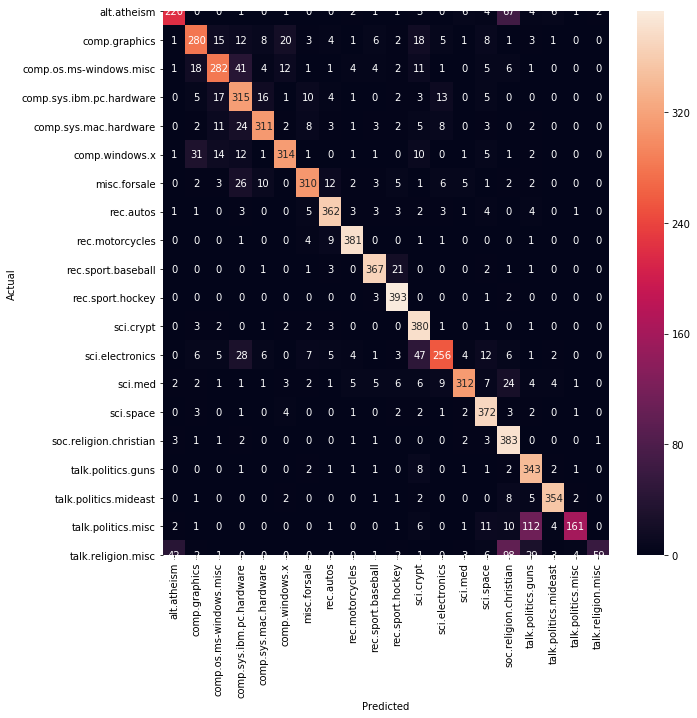

In [145]:
from sklearn.metrics import classification_report, confusion_matrix

test_set = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
docs_test = test_set.data
predicted = multinomialNB_pipeline.predict(docs_test)

print(
    classification_report(test_set.target,
                          predicted,
                          target_names=test_set.target_names))

# calculate confusion_matrix and plot it
confusion_mat = confusion_matrix(test_set.target, predicted)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mat,
            annot=True,
            fmt='d',
            xticklabels=test_set.target_names,
            yticklabels=test_set.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 4. SVM Classifier

### 4.1 Train svm

In [136]:
from sklearn.linear_model import SGDClassifier

SGDClassifier_pipline = Pipeline([('Vectorizer',
                                   CountVectorizer(stop_words='english',
                                                   max_df=0.5)),
                                  ('TF_IDF', TfidfTransformer()),
                                  ('SGDClassifier',
                                   SGDClassifier(loss='hinge',
                                                 penalty='l2',
                                                 alpha=1e-3,
                                                 random_state=42))])
print(" Show SGDClassifier_pipline:\n", SGDClassifier_pipline)

 Show SGDClassifier_pipline:
 Pipeline(memory=None,
         steps=[('Vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, voc...
                ('SGDClassifier',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optima

### 4.2 Evaluation SVM

In [137]:
SGDClassifier_pipline.fit(train_set.data, train_set.target)
predicted = SGDClassifier_pipline.predict(docs_test)
print(classification_report(test_set.target, predicted, target_names=test_set.target_names))
print(confusion_matrix(test_set.target, predicted))


                          precision    recall  f1-score   support

             alt.atheism       0.74      0.70      0.71       319
           comp.graphics       0.79      0.69      0.74       389
 comp.os.ms-windows.misc       0.73      0.78      0.75       394
comp.sys.ibm.pc.hardware       0.72      0.67      0.69       392
   comp.sys.mac.hardware       0.81      0.82      0.82       385
          comp.windows.x       0.85      0.76      0.81       395
            misc.forsale       0.83      0.87      0.85       390
               rec.autos       0.91      0.90      0.90       396
         rec.motorcycles       0.93      0.96      0.94       398
      rec.sport.baseball       0.88      0.92      0.90       397
        rec.sport.hockey       0.87      0.98      0.93       399
               sci.crypt       0.85      0.96      0.90       396
         sci.electronics       0.81      0.62      0.70       393
                 sci.med       0.89      0.87      0.88       396
         

### 4.3 SVM 

In [138]:
from sklearn.svm import LinearSVC

SVC_pipline = Pipeline([('Vectorizer', CountVectorizer()),
                        ('TF_IDF', TfidfTransformer()),
                        ('SVCClassifier', LinearSVC(random_state=42))])
print(" Show SVC_pipline:\n", SVC_pipline)

 Show SVC_pipline:
 Pipeline(memory=None,
         steps=[('Vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('TF_IDF',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('SVCClassifier',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, inter

In [139]:
from sklearn.metrics import classification_report, confusion_matrix

test_set = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
docs_test = test_set.data
SVC_pipline.fit(train_set.data, train_set.target)
predicted = SVC_pipline.predict(docs_test)
print(classification_report(test_set.target, predicted, target_names=test_set.target_names))
print(confusion_matrix(test_set.target, predicted))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.80      0.81       319
           comp.graphics       0.76      0.80      0.78       389
 comp.os.ms-windows.misc       0.77      0.73      0.75       394
comp.sys.ibm.pc.hardware       0.71      0.76      0.74       392
   comp.sys.mac.hardware       0.84      0.86      0.85       385
          comp.windows.x       0.87      0.76      0.81       395
            misc.forsale       0.83      0.91      0.87       390
               rec.autos       0.92      0.91      0.91       396
         rec.motorcycles       0.95      0.95      0.95       398
      rec.sport.baseball       0.92      0.95      0.93       397
        rec.sport.hockey       0.96      0.98      0.97       399
               sci.crypt       0.93      0.94      0.93       396
         sci.electronics       0.81      0.79      0.80       393
                 sci.med       0.90      0.87      0.88       396
         

## GridSearch

In [205]:
from sklearn.model_selection import GridSearchCV

bayes_params = {
    'Vectorizer__ngram_range': [(1, 1), (1, 2)],
    'TF_IDF__use_idf': (True, False),
    'MultinomialNB__alpha': (1e-2, 1e-3),
}

grid = GridSearchCV(multinomialNB_pipeline, bayes_params, cv=5, iid=False, n_jobs=-1)
grid.fit(train_set.data, train_set.target)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9130281301508074
{'MultinomialNB__alpha': 0.01, 'TF_IDF__use_idf': True, 'Vectorizer__ngram_range': (1, 2)}
Pipeline(memory=None,
         steps=[('Vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('TF_IDF',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('MultinomialNB',
                 Mult

In [207]:
svm_params = {
    'Vectorizer__ngram_range': [(1, 1), (1, 2)],
    'TF_IDF__use_idf': (True, False),
    'SGDClassifier__alpha': (1e-2, 1e-3),
}

grid = GridSearchCV(SGDClassifier_pipline, svm_params, cv=5, iid=False, n_jobs=-1)
grid.fit(train_set.data, train_set.target)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9024208153638664
{'SGDClassifier__alpha': 0.001, 'TF_IDF__use_idf': True, 'Vectorizer__ngram_range': (1, 2)}
Pipeline(memory=None,
         steps=[('Vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, voc...
                ('SGDClassifier',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_in